In [1]:
import math
import numpy as np
from ROOT import gROOT, gDirectory, gPad, gSystem, gStyle
from ROOT import TCanvas, TFile, TProfile, TNtuple, TF1, TH1F, TH2F, THStack, TLegend, TGraphErrors, TMultiGraph, TText, TLatex
from ROOT import TGaxis, TCut
from ROOT import kWhite, kBlack, kGray, kRed, kGreen, kBlue, kYellow, kMagenta, kCyan, kOrange, kSpring, kTeal, kAzure, kViolet, kPink
# %jsroot on

Welcome to JupyROOT 6.18/00


In [2]:
gStyle.SetOptFit(0)
gStyle.SetOptStat(0)  
gStyle.SetOptTitle(1)
gStyle.SetTitleBorderSize(0)
gStyle.SetTitleStyle(0)
gStyle.SetMarkerSize(1)
gStyle.SetTitleX(0.2) 
gStyle.SetTitleY(0.9)
gStyle.SetPadLeftMargin(0.2)

In [3]:
# file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/Polar/rootfiles/DQ_250GeV_uu.root")
file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/Polar/rootfiles/DQ_250GeV_uu.400.maxp10.root")


In [4]:
def makePretty(p, color):
    p.SetStats(0)
    p.SetMarkerColor(color)
    p.SetLineColor(color)
    p.SetFillColor(color)
    p.SetFillStyle(3003)
    p.SetMarkerStyle(1)
    p.SetMarkerSize(0.2)
    p.SetTitle("")

def GetKeyNames( self, dir = "" ):
        self.cd(dir)
        return [key.GetName() for key in gDirectory.GetListOfKeys()]
    
def Normal(h1):
    h1.Scale(1.0/h1.GetEntries())

In [5]:
TFile.GetKeyNames = GetKeyNames
keyList = file1.GetKeyNames()
print(keyList)

['h_mc_stable_nKaons_evt', 'h_mc_stable_Kaon_cos', 'h_mc_quark_cos', 'h_mc_quark_sep', 'h_mc_quark_m', 'h_mc_quark_pp', 'h_mc_quark_pz', 'h_mc_quark_E', 'h_mc_quark_p', 'h_mc_stable_isr_p', 'h_pfo_Kaon_cos', 'h_pfo_LeadKaons_abscos', 'h_pfo_LeadKaons_cos', 'h_pfo_LeadKaons_cosAdd', 'h_pfo_LeadK_phiDiff', 'h_pfo_k_mult_jet', 'h_pfo_jet_angdiff', 'h_pfo_jet_mult', 'h_pfo_jet_mult_uu', 'h_pfo_jet_mult_dd', 'h_pfo_jet_mult_ss', 'h_pfo_jet_LeadK_cos', 'h_pfo_jet_charge', 'h_pfo_jet_charge_u', 'h_pfo_jet_charge_ubar', 'h_pfo_jet_charge_d', 'h_pfo_jet_charge_dbar', 'h_pfo_jet_charge_s', 'h_pfo_jet_charge_sbar', 'h_pfo_q_match_charge', 'h_pfo_qbar_match_charge', 'h_pfo_LeadK_q_match_charge', 'h_pfo_LeadK_qbar_match_charge', 'h_pfo_LeadK_p', 'h_pfo_LeadK_p_10']


In [6]:
h_mc_quark_cos = file1.Get("h_mc_quark_cos")
h_pfo_LeadKaons_cos = file1.Get("h_pfo_LeadKaons_cos")

makePretty(h_mc_quark_cos,kBlack)
makePretty(h_pfo_LeadKaons_cos,kBlue)

In [7]:
Normal(h_mc_quark_cos)
Normal(h_pfo_LeadKaons_cos)

In [8]:
c1 = TCanvas("c1","c1",500,500)

In [9]:
h_mc_quark_cos.GetXaxis().SetTitle("cos#theta_{#bar{u},K^{-}}");

h_mc_quark_cos.Rebin(2)
h_pfo_LeadKaons_cos.Rebin(2)

h_mc_quark_cos.Draw("h")
h_pfo_LeadKaons_cos.Draw("hsame")

In [10]:
leg = TLegend(0.65,0.85,0.9,0.65,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.03)
leg.AddEntry(h_mc_quark_cos,"Parton Level","fp")
leg.AddEntry(h_pfo_LeadKaons_cos,"LeadK Reco","fp")
leg.Draw()

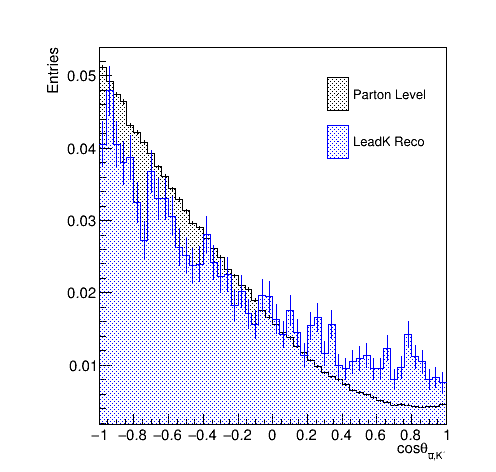

In [11]:
c1.Draw()

### Now let's fit the function

In [12]:
fgen  = TF1("fgen","[0]*(1+x*x)+[1]*x",-1.0,1.0)
freco = TF1("freco","[0]*(1+x*x)+[1]*x",-1.0,1.0)

fgen.SetParNames("S","A")
freco.SetParNames("S","A")

h_mc_quark_cos.Fit("fgen","MNRS")
h_pfo_LeadKaons_cos.Fit("freco","MNRS")

fgen.SetLineStyle(2)
fgen.SetLineColor(kGreen+1)

freco.SetLineStyle(2)
freco.SetLineColor(kGray+3)

 FCN=980.417 FROM HESSE     STATUS=OK             10 CALLS          53 TOTAL
                     EDM=4.20229e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  S            1.49736e-02   2.06340e-05   1.49466e-07   6.63435e-01
   2  A           -2.51104e-02   4.65944e-05   2.12799e-07   2.18199e-01
 FCN=92.1978 FROM HESSE     STATUS=OK             10 CALLS          78 TOTAL
                     EDM=5.05438e-14    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  S            1.46733e-02   2.28551e-04   1.90204e-07  -1.61475e-03
   2  A           -1.74799e-02   5.36232e-04   4.35528e-07  -3.49294e-04


In [13]:
c2 = TCanvas("c2","c2",500,500)

In [14]:
h_mc_quark_cos.GetYaxis().SetRangeUser(0,0.053)
h_mc_quark_cos.Draw("h")
h_pfo_LeadKaons_cos.Draw("same")
fgen.Draw("same")
freco.Draw("same")

In [17]:
leg2 = TLegend(0.5,0.85,0.75,0.65,"","brNDC")
leg2.SetFillColor(kWhite)
leg2.SetBorderSize(0)
leg2.SetTextSize(0.03)
leg2.AddEntry(h_mc_quark_cos,"Gen","f")
leg2.AddEntry(h_pfo_LeadKaons_cos,"Reco","pl")
leg2.AddEntry(fgen,"Gen Fit","l")
leg2.AddEntry(freco,"Reco Fit","l")
leg2.Draw()

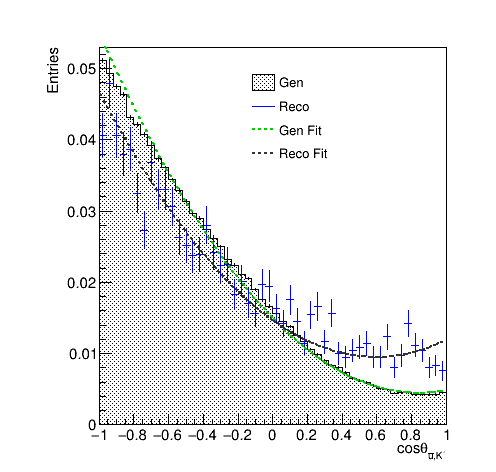

In [18]:
c2.Draw()

## Appendix

### Legend
```python
leg = TLegend(0.65,0.85,0.9,0.65,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.035)
leg.AddEntry(h_pfo_nKaons_evt,"All","fp")
leg.AddEntry(h_pfo_nKaons_evt_uu,"u#bar{u}","fp")
leg.AddEntry(h_pfo_nKaons_evt_ss,"s#bar{s}","fp")
leg.Draw()
```